# SUMMATIVE ASSESSMENT SECTION C
# SONAL AGARWAL

# Importing required Libraries

In [45]:
# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Loading and Understanding the Dataset

In [46]:
# Load the dataset
housing_price_df = pd.read_csv("housing.csv")

# Display the first 5 rows of the 'housing_price_df' DataFrame

In [47]:
housing_price_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Display a concise summary 

In [48]:
housing_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Summary statistics

In [49]:
housing_price_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Count and display the unique occurrences of rows 

In [50]:
housing_price_df.value_counts() # Unique combinations of values

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0             NEAR OCEAN         1
-118.19    34.12     35.0                2524.0       749.0           2487.0      679.0       2.4932         167700.0            <1H OCEAN          1
           34.13     52.0                2012.0       458.0           1314.0      434.0       3.9250         180400.0            <1H OCEAN          1
                     50.0                1309.0       302.0           883.0       293.0       3.1287         198000.0            <1H OCEAN          1
           34.12     52.0                679.0        132.0           483.0       163.0       4.2344         162500.0            <1H OCEAN          1
                                                                                                         

# Count the number of occurrences of each unique value

In [51]:
housing_price_df["ocean_proximity"].value_counts() # Distribution of categorical feature

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# This line checks for any missing (null) values in the 'housing_price_df' DataFrame.
# It will return the count of missing values for each column in the dataset.

In [52]:
housing_price_df.isnull().sum() # Check for missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Initial Visualization : Generating histograms for all numerical columns in the 'housing_price_df' DataFrame.
## The 'bins=50' argument sets the number of intervals for the histograms to 50.
## The 'figsize=(12,8)' argument specifies the size of the figure (12 inches by 8 inches).

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

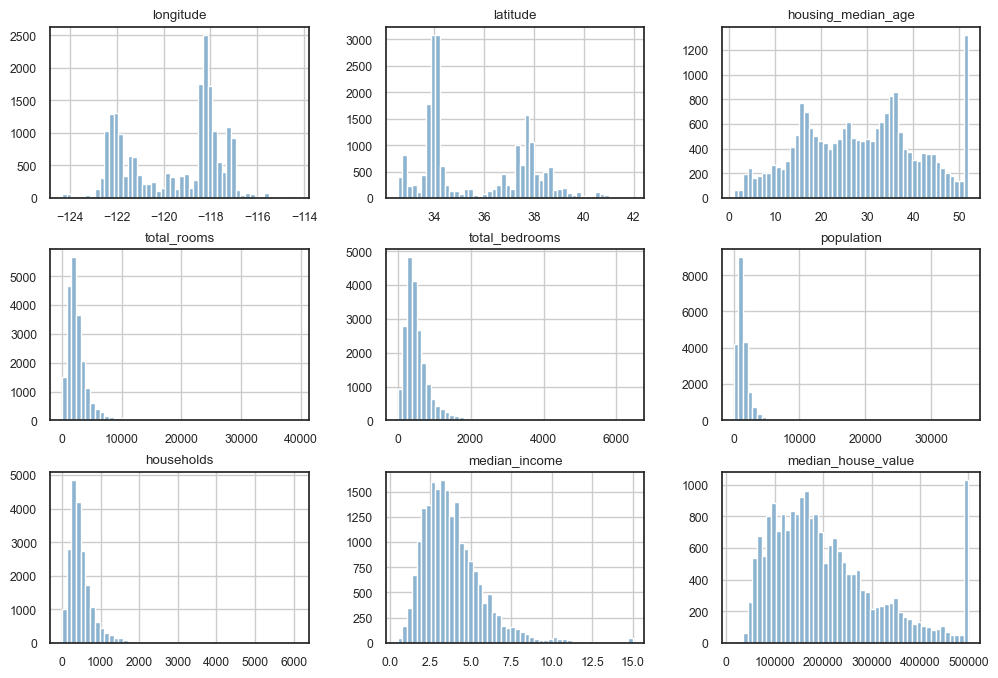

In [53]:
# Histograms of numerical features
housing_price_df.hist(bins=50,figsize=(12,8)) 

# Plot a scatter plot of longitude vs latitude to represent the locations of houses on a map-like grid.

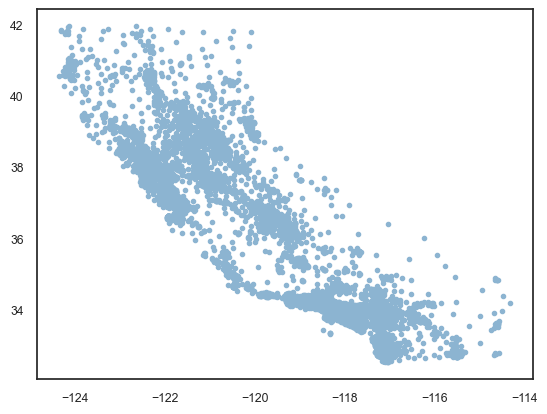

In [54]:
# Plot geographical data
plt.plot(housing_price_df["longitude"], housing_price_df["latitude"], ".")

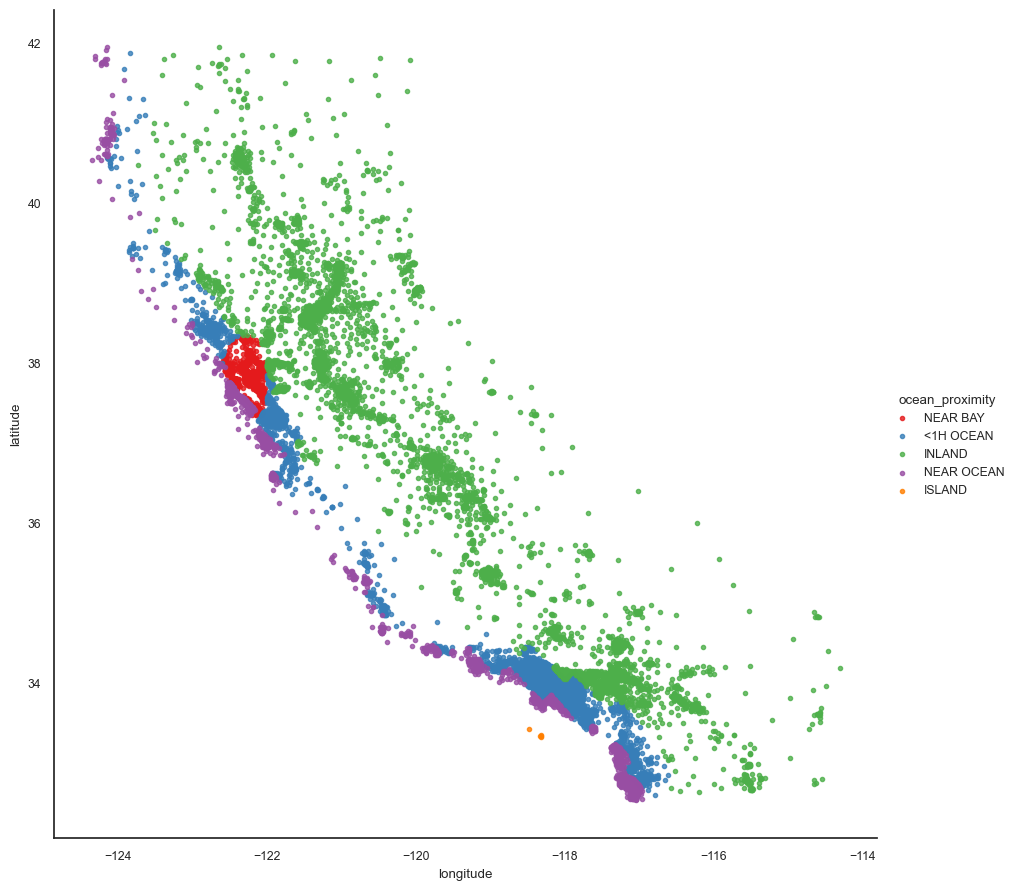

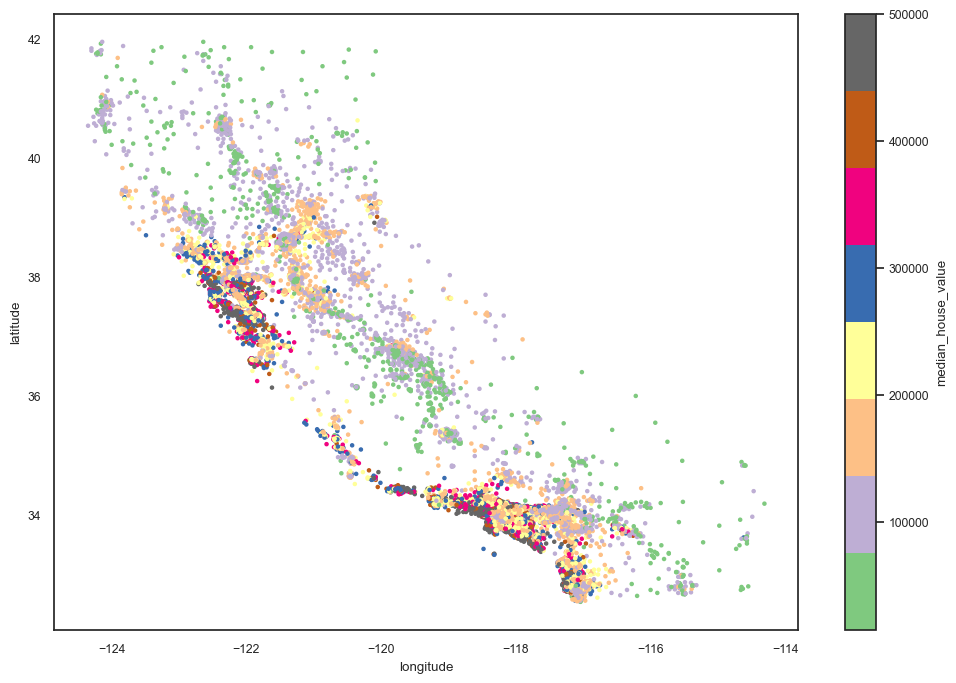

In [55]:
# Visualize distribution based on proximity to ocean
sns.lmplot(x="longitude",y="latitude",data=housing_price_df,markers=".",hue="ocean_proximity",fit_reg=False,height=9,palette="Set1")
plt.show()

housing_price_df.plot(kind="scatter",x="longitude",y="latitude",c="median_house_value",cmap="Accent",s=5,figsize=(12,8))
plt.show()

# Scatter plot of income vs housing prices

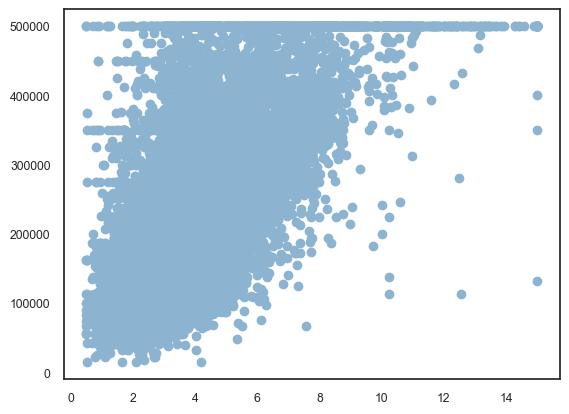

In [56]:
# The x-axis represents median income, and the y-axis represents median house values for each record in the dataset.
plt.scatter(housing_price_df["median_income"],housing_price_df["median_house_value"])

# Further Analysis of ocean_proximity

In [57]:
housing_price_df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

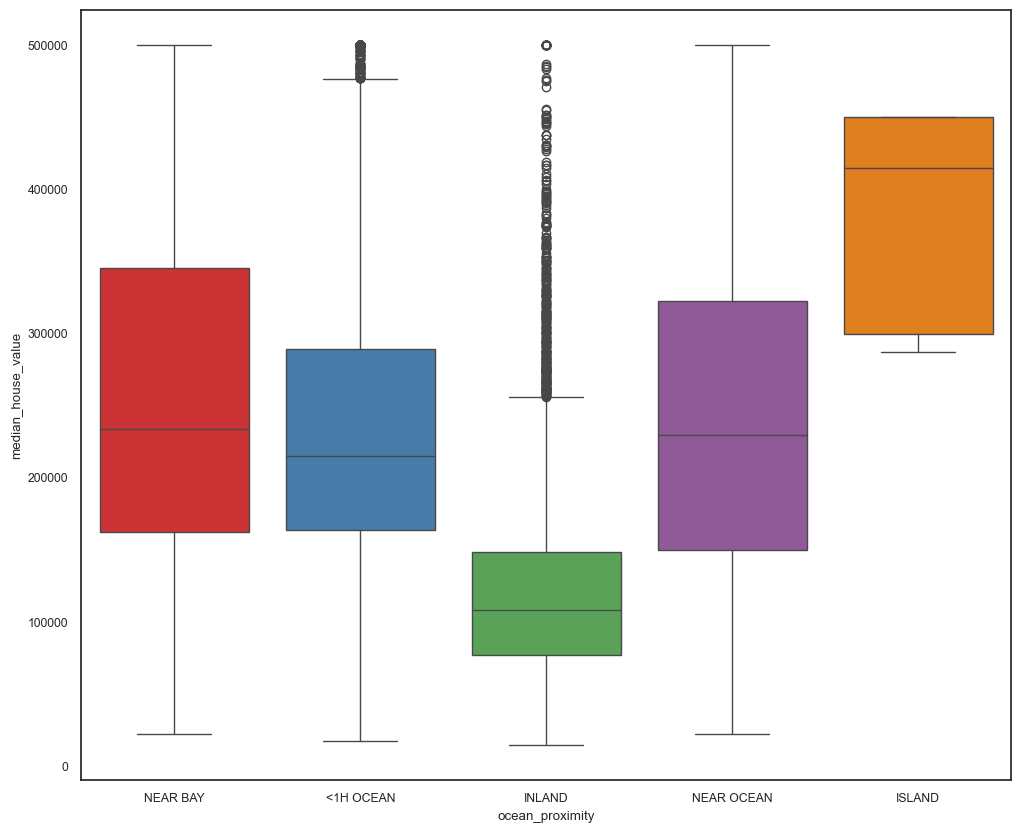

In [58]:
# Box plot to compare median house values based on proximity to ocean
plt.figure(figsize=(12,10))
sns.boxplot(x='ocean_proximity',y='median_house_value',data=housing_price_df,hue="ocean_proximity",palette="Set1")
plt.show()

<Axes: xlabel='ocean_proximity', ylabel='count'>

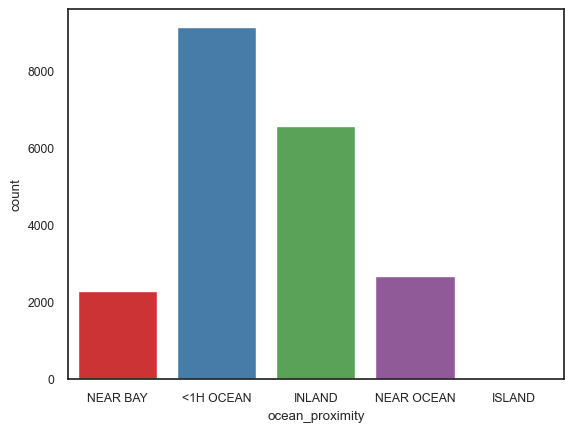

In [59]:
# Count plot for ocean proximity categories
sns.countplot(housing_price_df,x='ocean_proximity',palette="Set1",hue="ocean_proximity")

In [60]:
# Remove rows with "ISLAND" from ocean proximity as the count is too low
housing_price_df = housing_price_df[housing_price_df["ocean_proximity"] != "ISLAND"]

# Convert categorical feature into dummy variables
dummies = pd.get_dummies(housing_price_df["ocean_proximity"])

housing_price_df[dummies.columns] = dummies

#Feature Engineering by selecting relevant columns for analysis
housing_price_df= housing_price_df [["longitude",	"latitude",	"housing_median_age","total_rooms",	"total_bedrooms",	"population"	,"households",	"median_income",	"median_house_value",	"<1H OCEAN"	,"INLAND",	"NEAR BAY",	"NEAR OCEAN"]]

In [61]:
housing_price_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [62]:
# Handle missing values by filling with mean
housing_price_df = housing_price_df.fillna(housing_price_df.mean())

# Create new derived features
housing_price_df["rooms_per_household"] = housing_price_df["total_rooms"] / housing_price_df["households"]
housing_price_df["bedrooms_per_room"] = housing_price_df["total_bedrooms"] / housing_price_df["total_rooms"]
housing_price_df["population_per_household"] = housing_price_df["population"] / housing_price_df["households"]
housing_price_df.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
<1H OCEAN                   0
INLAND                      0
NEAR BAY                    0
NEAR OCEAN                  0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

# Calculate the correlation matrix for the numeric columns in the dataset.

In [63]:
# Correlation Analysis
corr_matrix = housing_price_df.corr(numeric_only=True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924676,-0.108394,0.044642,0.069304,0.099881,0.055400,-0.015090,-0.046208,0.321297,-0.055480,-0.474465,0.045568,-0.027558,0.076118,0.002486
latitude,-0.924676,1.000000,0.011462,-0.036231,-0.066741,-0.108978,-0.071199,-0.079977,-0.143837,-0.447303,0.351058,0.358735,-0.160942,0.106431,-0.092156,0.002349
housing_median_age,-0.108394,0.011462,1.000000,-0.361268,-0.319033,-0.296172,-0.302863,-0.118949,0.105272,0.045551,-0.236537,0.255333,0.021729,-0.153422,0.130615,0.013211
total_rooms,0.044642,-0.036231,-0.361268,1.000000,0.927255,0.857117,0.918480,0.197991,0.134373,-0.003136,0.025546,-0.023065,-0.009221,0.133802,-0.180225,-0.024590
total_bedrooms,0.069304,-0.066741,-0.319033,0.927255,1.000000,0.873920,0.974737,-0.007725,0.049559,0.018162,-0.006480,-0.019810,0.000650,0.001528,0.069738,-0.028360
population,0.099881,-0.108978,-0.296172,0.857117,0.873920,1.000000,0.907213,0.004737,-0.024421,0.074480,-0.020845,-0.060942,-0.024328,-0.072207,0.005207,0.069856
households,0.055400,-0.071199,-0.302863,0.918480,0.974737,0.907213,1.000000,0.012950,0.066069,0.042315,-0.039503,-0.010144,0.001660,-0.080593,0.027558,-0.027321
median_income,-0.015090,-0.079977,-0.118949,0.197991,-0.007725,0.004737,0.012950,1.000000,0.688563,0.168772,-0.237618,0.056150,0.027290,0.326915,-0.510960,0.018757
median_house_value,-0.046208,-0.143837,0.105272,0.134373,0.049559,-0.024421,0.066069,0.688563,1.000000,0.257049,-0.484794,0.160467,0.142051,0.151968,-0.220455,-0.023719
<1H OCEAN,0.321297,-0.447303,0.045551,-0.003136,0.018162,0.074480,0.042315,0.168772,0.257049,1.000000,-0.607909,-0.314925,-0.342742,-0.099558,0.060772,-0.001627


# Create a heatmap to visualize the correlation matrix calculated previously.
## The heatmap will display the correlation coefficients between numeric features in the dataset.

<Axes: >

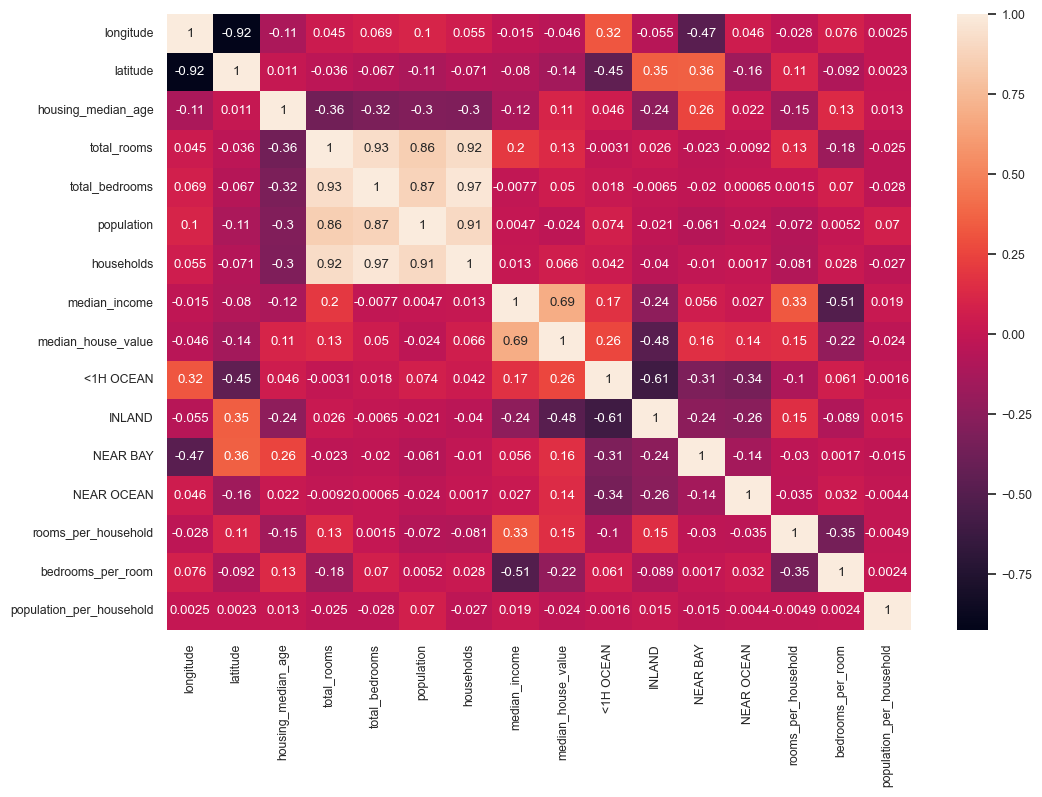

In [75]:
# Heatmap of correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)

# Create a new correlation matrix with modified columns

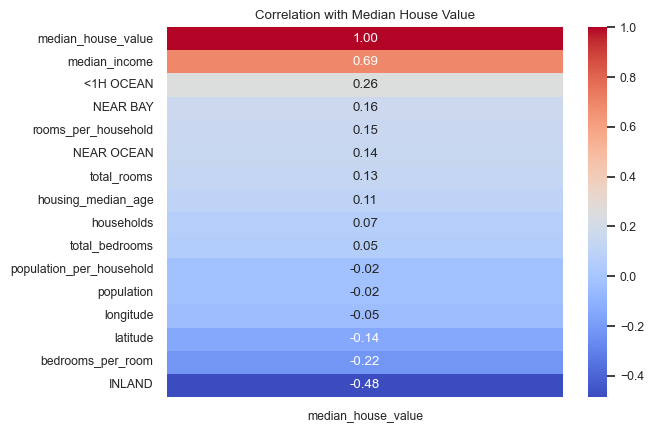

In [76]:
# Correlation with target variable
target_corr_sorted = corr_matrix["median_house_value"].sort_values(ascending=False)
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Median House Value')
plt.show()

# Splitting Dataset and Standardization

In [107]:
# Splitting data into features (X) and target (y)
X = housing_price_df.drop(["median_house_value"], axis=1)
y = housing_price_df["median_house_value"]

# Standardizing features
scaled_X = (X - X.mean()) / X.std()

# Splitting data into training and testing sets with various ratios
x_train1, x_test1, y_train1, y_test1 = train_test_split(scaled_X, y, test_size=0.2, random_state=42)


# Displays the values in the 'total_rooms' column

In [108]:
housing_price_df.total_rooms

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20635, dtype: float64

# Displaying the contents of the Dataframe

In [109]:
housing_price_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,5.329513,0.219892,2.123209


## Comparison of r2 score with other models to choose the best model

## Training and Validation Accuracy (R² Score) for Different Models

Starting with the original dataset:

Time: 280.862 s



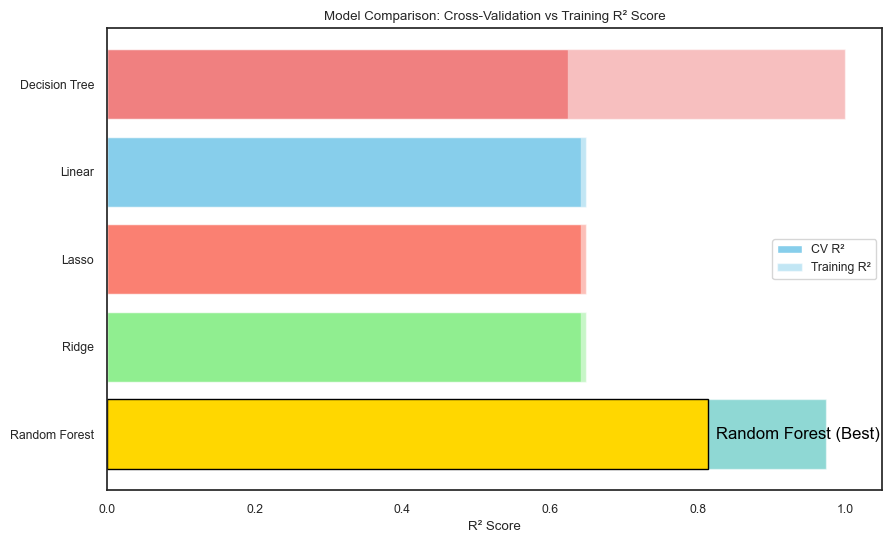

In [183]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

# Function to evaluate models using cross-validation
def test_model(clf, train, labels):
    # Cross-validation with R² scoring
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(clf, train, labels, cv=cv, scoring=r2)
    return [r2_val_score.mean()]

# Function to calculate training R² score
def training_accuracy(clf, train, labels):
    # Fit model and calculate R² score on training data
    clf.fit(train, labels)
    return clf.score(train, labels)  # R² score on training data

print('Starting with the original dataset:\n')

# Example: Assuming x_train1 and y_train1 are your feature and target variables
# Evaluating multiple models
res = {}

now = time.time()

# Evaluating models using cross-validation and training accuracy
res['Linear'] = test_model(LinearRegression(), x_train1, y_train1)
res['Ridge'] = test_model(Ridge(), x_train1, y_train1)
res['Lasso'] = test_model(Lasso(alpha=1e-4), x_train1, y_train1)
res['Decision Tree'] = test_model(DecisionTreeRegressor(), x_train1, y_train1)
res['Random Forest'] = test_model(RandomForestRegressor(), x_train1, y_train1)

# Calculate training R² scores
training_res = {}
for model_name in res.keys():
    if model_name == 'Linear':
        clf = LinearRegression()
    elif model_name == 'Ridge':
        clf = Ridge()
    elif model_name == 'Lasso':
        clf = Lasso(alpha=1e-4)
    elif model_name == 'Decision Tree':
        clf = DecisionTreeRegressor()
    elif model_name == 'Random Forest':
        clf = RandomForestRegressor()
    
    training_res[model_name] = training_accuracy(clf, x_train1, y_train1)

# Calculate time taken for evaluation
t = time.time() - now
print('Time: %.3f s\n' % t)

# Combining cross-validation and training accuracy results
cv_results = pd.DataFrame.from_dict(res, orient='index', columns=["Cross-Validation R² Score"])
training_results = pd.DataFrame.from_dict(training_res, orient='index', columns=["Training R² Score"])

# Merging results
results = pd.concat([cv_results, training_results], axis=1)
results = results.sort_values(by="Cross-Validation R² Score", ascending=False)

# Print R² values for each algorithm
print("\nR² Scores for Different Models:")
for model_name in results.index:
    print(f"{model_name}:")
    print(f"  Cross-Validation R²: {results.loc[model_name, 'Cross-Validation R² Score']:.4f}")
    print(f"  Training R²: {results.loc[model_name, 'Training R² Score']:.4f}")
    print("-" * 40)

# Color mapping for each model
model_colors = {
    'Linear': 'skyblue',
    'Ridge': 'lightgreen',
    'Lasso': 'salmon',
    'Decision Tree': 'lightcoral',
    'Random Forest': 'lightseagreen'
}

# Plotting the bar graph for Model Scores (R² Scores)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each model's cross-validation R² and training R² in a bar plot with different colors
for model_name in results.index:
    ax.barh(model_name, results.loc[model_name, 'Cross-Validation R² Score'], 
            color=model_colors.get(model_name, 'grey'), label='CV R²' if model_name == 'Linear' else "")
    ax.barh(model_name, results.loc[model_name, 'Training R² Score'], 
            color=model_colors.get(model_name, 'grey'), alpha=0.5, label='Training R²' if model_name == 'Linear' else "")

# Highlight the model with the highest cross-validation R² score
best_model = results.index[0]
best_cv_r2 = results.loc[best_model, 'Cross-Validation R² Score']
ax.barh(best_model, best_cv_r2, color='gold', edgecolor='black', height=0.8)  # Highlight with gold

# Adding labels and title
ax.set_xlabel('R² Score')
ax.set_title('Model Comparison: Cross-Validation vs Training R² Score')

# Add a text annotation for the best model
ax.text(best_cv_r2 + 0.01, best_model, f'{best_model} (Best)', va='center', color='black', fontsize=12)

# Remove duplicate labels from legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Show plot
plt.show()


## Training model on different size of train and test splits

In [121]:
# Initializing Random Forest with basic parameters
forest_reg1 = RandomForestRegressor(n_estimators=20,criterion='squared_error', max_depth=None, min_samples_split=2, 
                                   min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                   bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
                                   ccp_alpha=0.0, max_samples=None,)
forest_reg1.fit(x_train1, y_train1)


RandomForestRegressor(n_estimators=20)

In [136]:

splits = [(0.8, 0.2), (0.75, 0.25), (0.85, 0.15), (0.7, 0.3)]
rmse_scores = []
mean_rmse_scores =[]

# Iterate over each training dataset split and calculate RMSE
for train_size, test_size in splits:
    # Split the dataset based on the current train/test ratio
    x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, train_size=train_size, random_state=42)

    # Train the Random Forest model
    forest_reg1.fit(x_train, y_train)
    
    # Make predictions on the test data
    preds = forest_reg1.predict(x_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    rmse_scores.append(rmse)
    mean_rmse = rmse.mean()
    mean_rmse_scores.append(mean_rmse)


## Checking the scores on different train and test sizes

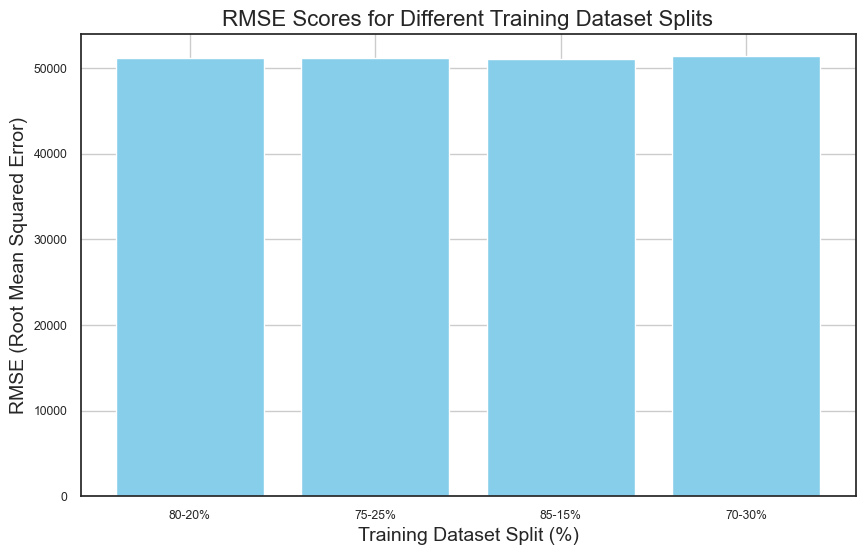

Training Split: 80-20%, RMSE: 51200.981
Training Split: 75-25%, RMSE: 51227.965
Training Split: 85-15%, RMSE: 51011.161
Training Split: 70-30%, RMSE: 51384.098


In [137]:

# Plotting RMSE scores for different training splits
split_labels = [f"{int(train*100)}-{int(test*100)}%" for train, test in splits]

plt.figure(figsize=(10,6))
plt.bar(split_labels, rmse_scores, color='skyblue')

# Adding labels and title
plt.title('RMSE Scores for Different Training Dataset Splits', fontsize=16)
plt.xlabel('Training Dataset Split (%)', fontsize=14)
plt.ylabel('RMSE (Root Mean Squared Error)', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

# Printing RMSE values for reference
for label, rmse in zip(split_labels, rmse_scores):
    print(f"Training Split: {label}, RMSE: {rmse:.3f}")

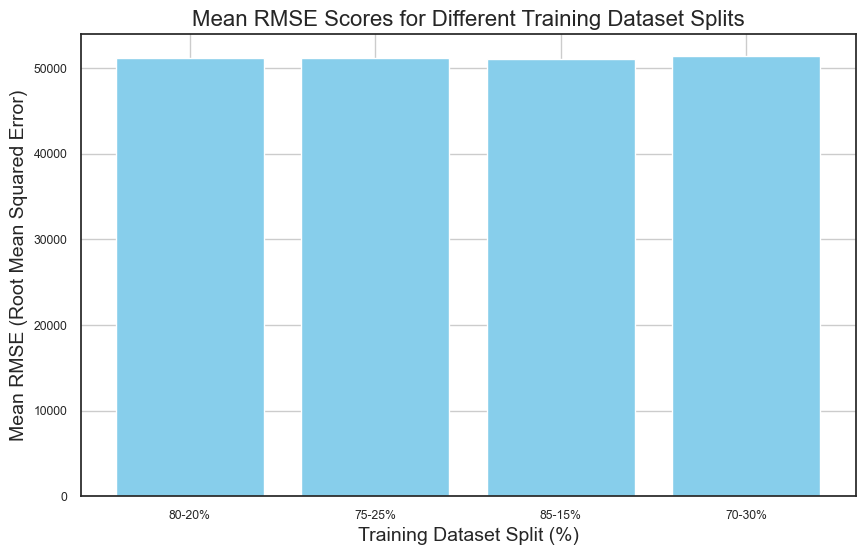

Training Split: 80-20%, Mean RMSE: 51384.098
Training Split: 75-25%, Mean RMSE: 51384.098
Training Split: 85-15%, Mean RMSE: 51384.098
Training Split: 70-30%, Mean RMSE: 51384.098


In [139]:
# Plotting RMSE scores for different training splits
split_labels = [f"{int(train*100)}-{int(test*100)}%" for train, test in splits]

plt.figure(figsize=(10,6))
plt.bar(split_labels, mean_rmse_scores, color='skyblue')

# Adding labels and title
plt.title('Mean RMSE Scores for Different Training Dataset Splits', fontsize=16)
plt.xlabel('Training Dataset Split (%)', fontsize=14)
plt.ylabel('Mean RMSE (Root Mean Squared Error)', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

# Printing RMSE values for reference
for label, rmse in zip(split_labels, mean_rmse_scores):
    print(f"Training Split: {label}, Mean RMSE: {mean_rmse:.3f}")

## Checking score on different size of train and test data

In [149]:
# score check 
from sklearn.model_selection import cross_val_score

x_train1, x_test1, y_train1, y_test1 = train_test_split(scaled_X, y, test_size=0.15, random_state=42)

forest_reg1 = RandomForestRegressor(n_estimators=100,criterion='squared_error', max_depth=None, min_samples_split=2, 
                                   min_samples_leaf=1, max_features=5)
forest_reg1.fit(x_train1, y_train1)

scores1 = cross_val_score(forest_reg1, x_train1, y_train1,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores1 = np.sqrt(-scores1)

In [146]:
def display_val_scores(scores):
    print("scores:", scores)
    print("mean:  ", scores.mean())
    print("stddev:", scores.std())

In [150]:
display_val_scores(tree_rmse_scores1)

scores: [48883.6725716  48526.42391679 49309.56971911 49850.59279836
 47943.91247693]
mean:   48902.83429655806
stddev: 651.9605637693007


In [151]:
#predictions on basic model
preds = forest_reg1.predict(x_test1)
print(preds)

# Calculate RMSE
final_rmse = np.sqrt(mean_squared_error(y_test1,preds))
print(final_rmse)

# Evaluate model performance
train_acc = forest_reg1.score(x_train1,y_train1)
print(train_acc)
test_acc = forest_reg1.score(x_test1,y_test1)
print(test_acc)

[217210.   115399.    93084.   ... 272469.05 272718.01  79026.  ]
47772.94109056252
0.9755302934183873
0.8284141798288951


## Hyperparameter tuning with cross validation

In [154]:
# cross validation technique for best parameters on performance (automatic)
parameters = {
    "n_estimators":[10,20,50,100],
    "max_depth":[None,5,8],
    "min_samples_leaf":[1,2],
    "max_features":[None,2,5,8]
}

# Hyperparameter tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV

gsdt = GridSearchCV(forest_reg1,param_grid=parameters,scoring="neg_mean_squared_error",cv=3,verbose=1)

gsdt.fit(x_train1,y_train1)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(max_features=5),
             param_grid={'max_depth': [None, 5, 8],
                         'max_features': [None, 2, 5, 8],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [155]:
gsdt.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [156]:
gsdt.best_score_

-2440304325.2651343

## Testing the model with best parameters now!

In [157]:
## Model with best parameters

fst_reg = RandomForestRegressor(max_depth= None, max_features= 5, min_samples_leaf= 1, n_estimators = 100)
fst_reg.fit(x_train1,y_train1)
preds = fst_reg.predict(x_test1)

In [158]:
# Model accuracy on training and testing dataset with best hyperparameters
train_Score = fst_reg.score(x_train1,y_train1) 
test_Score = fst_reg.score(x_test1,y_test1)

# Best parameters and score
print(train_Score)
print(test_Score)



0.9751326744947868
0.8251850238926792


## It can be noticed that the model reaches the validation accuracy of 82.5%

# Scatter Plot of Predictions vs. Actual Values

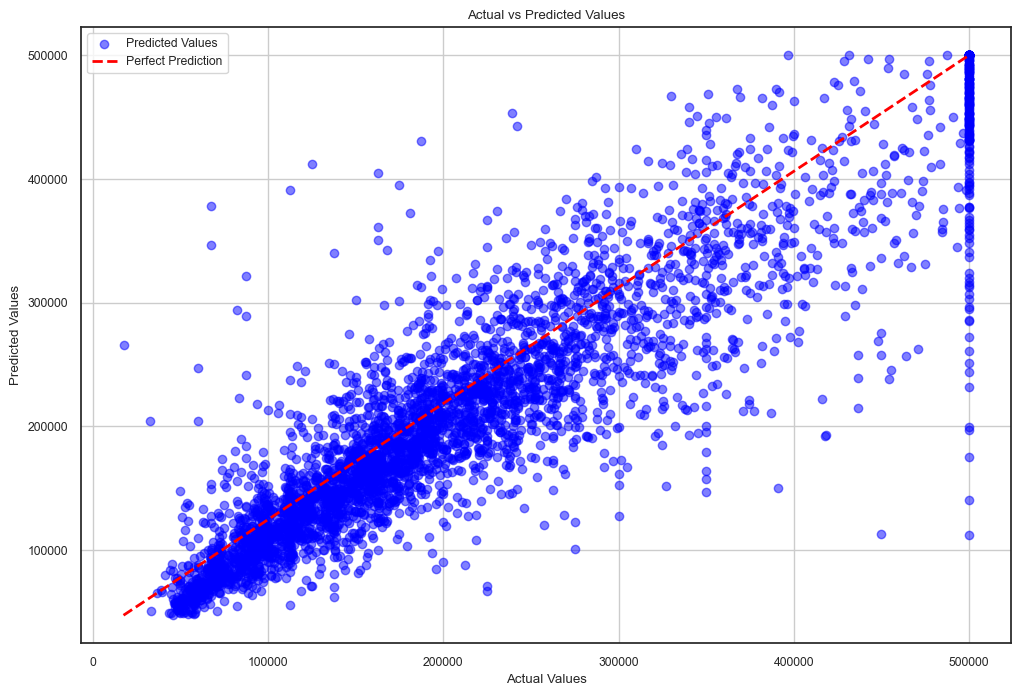

In [105]:
plt.figure(figsize=(12,8))
plt.scatter(y_test1, preds, alpha=0.5, color='blue',label='Predicted Values')
plt.plot([min(y_test1), max(y_test1)], [min(preds), max(preds)], color='red', linestyle='--', linewidth=2,label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()  
plt.grid(True)
plt.show()

# Get feature importance from the RandomForest model

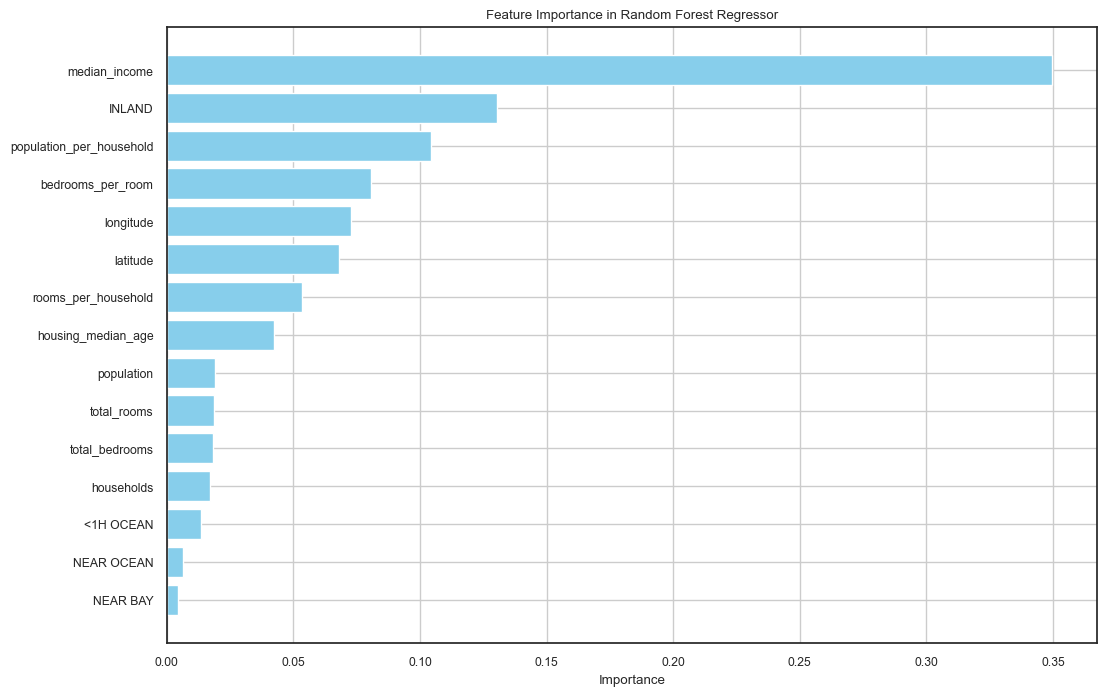

In [159]:
feature_importances = fst_reg.feature_importances_

# Assuming a list of feature names in the same order as dataset columns
feature_names = x_train1.columns  

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)
sorted_feature_names = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Regressor')
plt.grid(True)
plt.show()

## It can be noticed that among all the linear models, Random Forest Regressor performed the best on the training and validation data with an accuarcy of 97% and 82% respectively

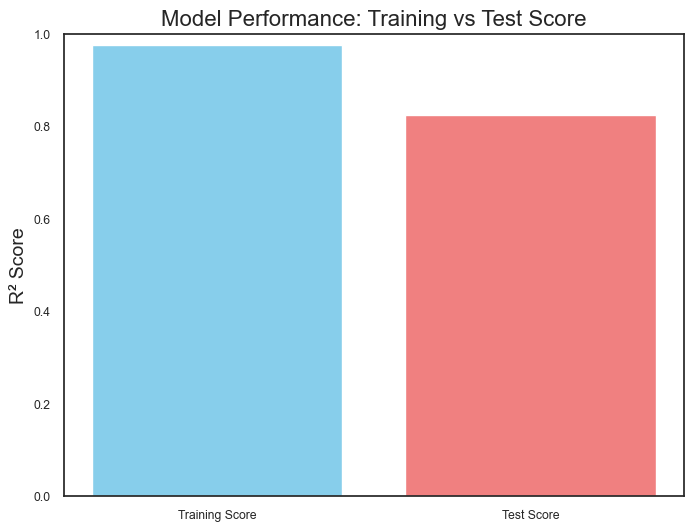

Training Score (R²): 0.975
Test Score (R²): 0.825


In [161]:

# Assume train_Score and test_Score are already calculated
train_Score = fst_reg.score(x_train1, y_train1)  # R^2 score for training data
test_Score = fst_reg.score(x_test1, y_test1)    # R^2 score for test data

# Create a bar plot to compare the scores
labels = ['Training Score', 'Test Score']
scores = [train_Score, test_Score]

plt.figure(figsize=(8, 6))

# Plotting a bar graph for Training and Test scores
plt.bar(labels, scores, color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.title('Model Performance: Training vs Test Score', fontsize=16)
plt.ylabel('R² Score', fontsize=14)
plt.ylim(0, 1)  # R² score ranges from 0 to 1

# Display the plot
plt.show()

# Print the scores for reference
print(f"Training Score (R²): {train_Score:.3f}")
print(f"Test Score (R²): {test_Score:.3f}")

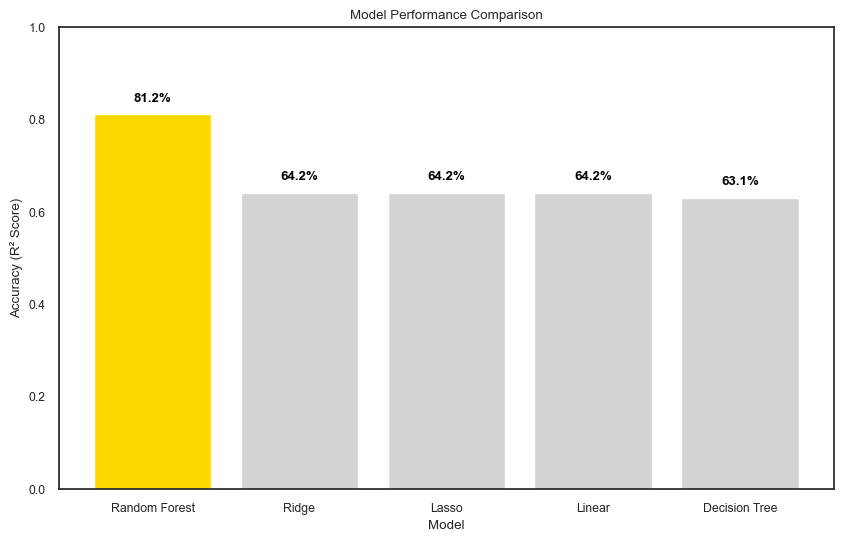

,Cross-Validation R² Score,Training R² Score
Random Forest,0.811597,0.974141
Ridge,0.642031,0.648108
Lasso,0.642018,0.648108
Linear,0.642018,0.648108
Decision Tree,0.631276,1.000000


In [172]:
# Model names and their accuracy (R²) scores
models = results.index.tolist()
accuracy = results["Cross-Validation R² Score"].tolist()  # Example R² scores or accuracy

# Create a color array that highlights Random Forest in a unique color
colors = ['gold', 'lightgray', 'lightgray', 'lightgray', 'lightgray']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy, color=colors)

# Add labels and title
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (R² Score)')
plt.ylim(0, 1)  # R² values range from 0 to 1

# Display accuracy percentages above the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{accuracy[i]*100:.1f}%', 
             ha='center', va='bottom', color='black', fontweight='bold')

# Show the plot
plt.show()



# Conclusion:

## From the experiments conducted on the California House Price Prediction dataset, it is evident that Random Forest Regression provides the most reliable predictions compared to other models, achieving approximately 82% accuracy on the cross-validation set. After tuning the hyperparameters, the model's accuracy improved slightly, reaching 83%, which demonstrates the effectiveness of fine-tuning the model for better performance. 

## Although other models like Ridge and Lasso Regression performed reasonably well, they could not capture the complex non-linear relationships in the dataset as effectively as Random Forest. The Decision Tree model showed strong performance on training data but suffered from overfitting, highlighting the advantage of ensemble methods like Random Forest that can reduce variance.

## Moving forward, there are opportunities to improve the model by exploring more advanced techniques such as Gradient Boosting, adding more features, or using external datasets. Nevertheless, this analysis provides valuable insights for predicting house prices and can be used by real estate professionals or city planners to make more informed decisions.

## In conclusion, Random Forest Regression is well-suited for this problem, providing accurate and stable predictions, and with further refinement, its performance could improve even more.